# Data Science Challenge

In [45]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install tensorflow

     |████████████████████████████████| 497.5 MB 14 kB/s s eta 0:00:013
     |████████████████████████████████| 126 kB 76.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 15.7 MB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 71.6 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 8.9 MB/s  eta 0:00:01
     |████████████████████████████████| 1.4 MB 73.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 76.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 8.9 MB/s  eta 0:00:01
     |████████████████████████████████| 4.9 MB 76.9 MB/s eta 0:00:01
     |███████████████████████████

In [95]:
# installing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [96]:
# installing libraries for modeling
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelBinarizer

In [97]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [98]:
# Loading Dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

In [99]:
df_train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [100]:
#Explore columns
df_train.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [101]:
#Description
df_train.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [102]:
df_train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

## NULL Values Analysis

In [103]:
#Analysing Null Values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys = ["Total", "Percent"])
missing_data.head()

,Total,Percent
reviews_per_month,676,0.23554
yearly_availability,0,0.00000
owned_hotels,0,0.00000
owner_id,0,0.00000
number_of_reviews,0,0.00000


#### Observation:

Review_per_month has NaN values where number_of_reviews are 0. So, when are there 0 number of reviews, reviews_of_month will be imputed by 0. 


## Imputting Nan Values

In [104]:
df_train = df_train.fillna(0)
df_train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


## Feature Extraction

Calculating the payable cost to stay for the minimum number of days at the hotel.

Total Cost = Cost * minimum_nights

In [105]:
# Minimum cost payable at the hotel
df_train['total_cost'] = (df_train['cost'] * df_train['minimum_nights'])
df_train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,total_cost
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,850
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,195
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1,85
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1,6300
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1,225


## Exploratory Data Analysis

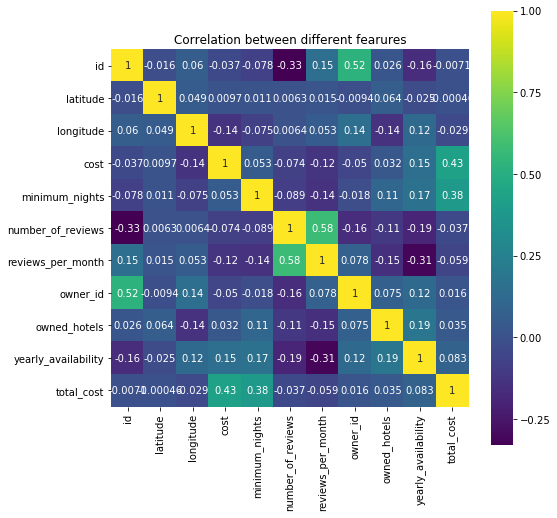

In [106]:
# Correlation heatmap
correlation = df_train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis') 
plt.title('Correlation between different fearures');

Text(0.5, 1.0, 'Region vs Yealy Availability')

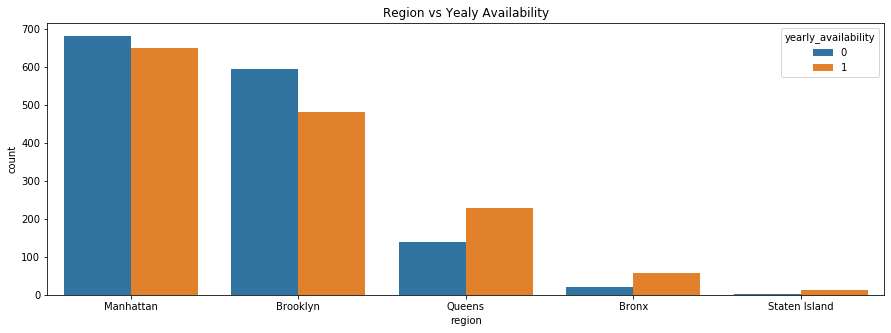

In [107]:
# Region vs Yealy Availability Count Plot
plt.figure(figsize = (15,5))
sns.countplot(x='region', hue = 'yearly_availability', data = df_train)
plt.title('Region vs Yealy Availability')

Text(0, 0.5, 'total_cost')

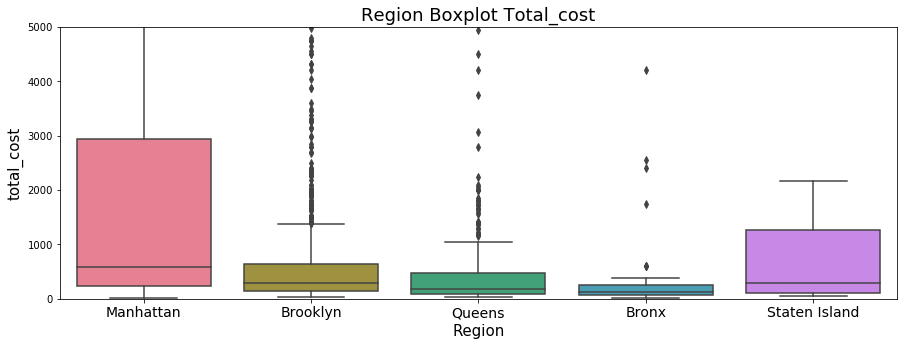

In [108]:
# Total cost distribution region-wise
x = df_train[["region", "total_cost"]]

fig, ax = plt.subplots(figsize=(15, 5));
sns.boxplot(x = "region", y = "total_cost", data = x, palette = 'husl');

plt.title('Region Boxplot Total_cost', fontsize = 18)
ax.set_ylim(0, 5000)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Region", fontsize = 15)
plt.ylabel("total_cost", fontsize = 15)

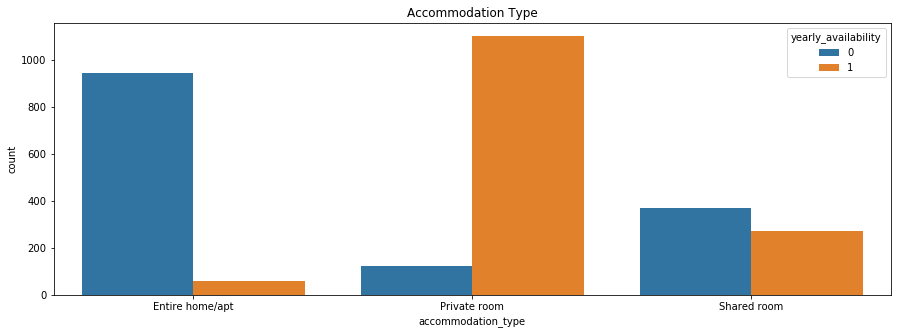

In [109]:
# Yearly availability according to Accomodation Type
plt.figure(figsize = (15,5))
sns.countplot(x='accommodation_type', hue = 'yearly_availability', data = df_train)
plt.title('Accommodation Type');

Text(0, 0.5, 'total_cost')

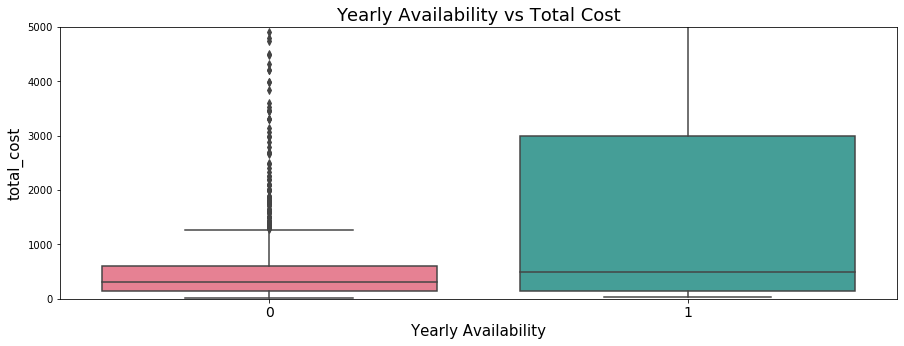

In [110]:
# Total cost distribution according to yearly availability
x = df_train[["yearly_availability", "total_cost"]]

fig, ax = plt.subplots(figsize=(15, 5));
sns.boxplot(x = "yearly_availability", y = "total_cost", data = x, palette = 'husl');

plt.title('Yearly Availability vs Total Cost', fontsize = 18)
ax.set_ylim(0, 5000)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Yearly Availability", fontsize = 15)
plt.ylabel("total_cost", fontsize = 15)

## Data Modeling 

In [111]:
df_train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,total_cost
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,850
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,195
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1,85
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1,6300
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1,225


In [112]:
df_train.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability', 'total_cost'],
      dtype='object')

In [113]:
#Selecting the most important features on the basis of above done EDA
l = ['region', 'accommodation_type', 'number_of_reviews', 'reviews_per_month',
       'owned_hotels', 'total_cost']

In [114]:
#Taking the features and target Value
x_train = df_train[l]
y_train = df_train['yearly_availability']

In [115]:
#Converting Categorical Variables into dummy variables for modeling purpose 
x_data = pd.get_dummies(x_train)

In [116]:
x_data.head()

,number_of_reviews,reviews_per_month,owned_hotels,total_cost,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,7,0.56,1,850,0,0,1,0,0,1,0,0
1,238,2.30,1,195,0,1,0,0,0,1,0,0
2,0,0.00,1,85,0,0,0,1,0,0,1,0
3,0,0.00,65,6300,0,0,1,0,0,0,1,0
4,38,0.42,3,225,0,0,1,0,0,0,0,1


In [117]:
# Scaling all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
cols = x_data.columns
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x_data)

X = pd.DataFrame(np_scaled, columns = cols)
X.head()

,number_of_reviews,reviews_per_month,owned_hotels,total_cost,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,0.017722,0.054002,0.000000,0.000709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.602532,0.221794,0.000000,0.000150,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000056,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.000000,0.196319,0.005368,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.096203,0.040501,0.006135,0.000175,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [118]:
# creating train test validation split as 70,15,15
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [119]:
# Model_assess gets us the accuracy,F1 score and Confusion Matrix  
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print("F1 Score: ",f1_score(y_test,preds, average='macro'))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### XGBoost Classifier

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score:  0.9302189717846633
Accuracy Cross Gradient Booster : 0.93023 



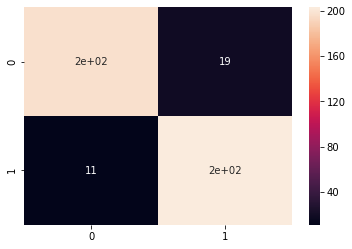

In [120]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.005)
model_assess(xgb, "Cross Gradient Booster")

## Stochastic Gradient Descent

F1 Score:  0.8195945099193052
Accuracy Stochastic Gradient Descent : 0.82093 



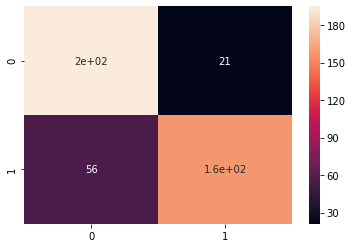

In [121]:
sgd = SGDClassifier(max_iter=50000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

## Multi Layer Perceptron

F1 Score:  0.9069586290462177
Accuracy Neural Nets : 0.90698 



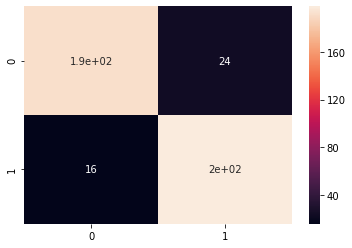

In [122]:
nn = MLPClassifier(solver='adam', alpha=1e-5, activation='relu', hidden_layer_sizes=(1000, 100), random_state=1)
model_assess(nn, "Neural Nets")

## Support Vector Machine

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F1 Score:  0.8149086530340923
Accuracy Support Vector Machine : 0.81628 



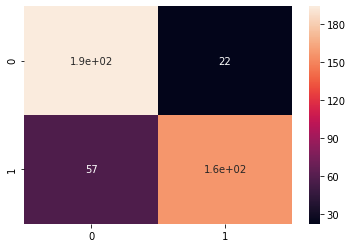

In [123]:
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

## Random Forest Classifier

F1 Score:  0.9232221795378182
Accuracy Random Forest : 0.92326 



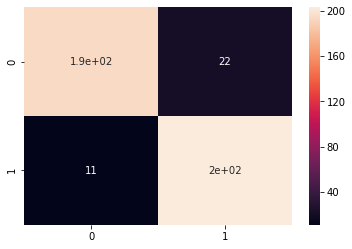

In [124]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


## LGBM

In [125]:
clf = LGBMClassifier(num_leaves=30, max_depth=10, learning_rate=0.01, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.1, silent=-1, verbose =-1, random_state=42)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose = 100, early_stopping_rounds= 500)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future releas

[100]	training's binary_logloss: 0.309104	valid_1's binary_logloss: 0.346385
[200]	training's binary_logloss: 0.204012	valid_1's binary_logloss: 0.269666
[300]	training's binary_logloss: 0.157911	valid_1's binary_logloss: 0.250134
[400]	training's binary_logloss: 0.13034	valid_1's binary_logloss: 0.252445
[500]	training's binary_logloss: 0.108527	valid_1's binary_logloss: 0.24872
[600]	training's binary_logloss: 0.0928144	valid_1's binary_logloss: 0.252093
[700]	training's binary_logloss: 0.0803286	valid_1's binary_logloss: 0.256726
[800]	training's binary_logloss: 0.070542	valid_1's binary_logloss: 0.262014
[900]	training's binary_logloss: 0.0625043	valid_1's binary_logloss: 0.266121


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1, silent=-1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

In [126]:
fold_importance_df = pd.DataFrame()
feature_importance_df = pd.DataFrame()
fold_importance_df['feature'] = X_train.columns
fold_importance_df['importance'] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df,fold_importance_df], axis=0)

## Feature Importance Plot uing LGBM

Text(0.5, 1.0, 'LGBM Features (avg over folds)')

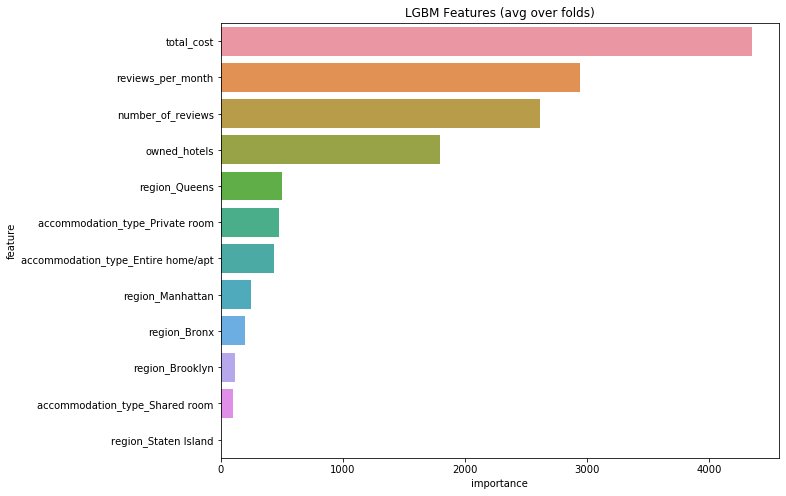

In [127]:
## plotting feature importance matrix
cols = feature_importance_df[['feature','importance']].groupby('feature').mean().sort_values(by = "importance", ascending=False)[:20].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(10,8))
sns.barplot(x='importance',y = 'feature', data=best_features.sort_values(by="importance", ascending=False))
plt.title("LGBM Features (avg over folds)")

In [128]:
y_pred_lgbm = clf.predict(X_test)

In [129]:
print(accuracy_score(y_test, y_pred_lgbm))

0.9302325581395349


## Recursive Feature Elimination 

In [130]:
from sklearn.feature_selection import RFE
selector = RFE(clf, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-package

RFE(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                             colsample_bytree=1.0, importance_type='split',
                             learning_rate=0.01, max_depth=10,
                             min_child_samples=20, min_child_weight=0.001,
                             min_split_gain=0.0, n_estimators=10000, n_jobs=-1,
                             num_leaves=30, objective=None, random_state=42,
                             reg_alpha=0.1, reg_lambda=0.1, silent=-1,
                             subsample=1.0, subsample_for_bin=200000,
                             subsample_freq=0, verbose=-1),
    n_features_to_select=5, step=1, verbose=0)

In [ ]:
sel_pred = selector.predict(X_val)

In [65]:
print(accuracy_score(y_val, sel_pred))

0.8955916473317865


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [132]:
df_test.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels'],
      dtype='object')

In [133]:
df_test = df_train.fillna(0)
df_test.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,total_cost
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,850
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,195
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1,85
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1,6300
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1,225


In [134]:
df_test['total_cost'] = (df_test['cost'] * df_test['minimum_nights'])
df_test.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,total_cost
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,850
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,195
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1,85
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,0.00,200380610,65,1,6300
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1,225


In [135]:
l = ['region', 'accommodation_type', 'number_of_reviews', 'reviews_per_month',
       'owned_hotels', 'total_cost']

In [136]:
x_test = df_test[l]

In [137]:
x_data_test = pd.get_dummies(x_test)

In [138]:
x_data_test.head()

,number_of_reviews,reviews_per_month,owned_hotels,total_cost,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,7,0.56,1,850,0,0,1,0,0,1,0,0
1,238,2.30,1,195,0,1,0,0,0,1,0,0
2,0,0.00,1,85,0,0,0,1,0,0,1,0
3,0,0.00,65,6300,0,0,1,0,0,0,1,0
4,38,0.42,3,225,0,0,1,0,0,0,0,1


In [139]:
from sklearn.preprocessing import MinMaxScaler
cols = x_data_test.columns
min_max_scaler = MinMaxScaler()
np_scaled_test = min_max_scaler.fit_transform(x_data_test)

X_test = pd.DataFrame(np_scaled_test, columns = cols)
X_test.head()

,number_of_reviews,reviews_per_month,owned_hotels,total_cost,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,0.017722,0.054002,0.000000,0.000709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.602532,0.221794,0.000000,0.000150,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000056,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.000000,0.196319,0.005368,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.096203,0.040501,0.006135,0.000175,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### I have selected XGBoost as my final model because it has highest the accuracy of 94%. 

In [148]:
yearly_availability = xgb.predict(X_test)
yearly_availability

array([0, 0, 1, ..., 0, 1, 1])

In [149]:
final_dataset = pd.DataFrame()

In [150]:
final_dataset['Id'] = df_test['id']
final_dataset['yearly_availability']= yearly_availability

In [151]:
final_dataset

,Id,yearly_availability
0,13232,0
1,246,0
2,19091,1
3,34305,1
4,444,1
...,...,...
2865,47852,1
2866,21978,1
2867,23485,0
2868,16757,1


In [152]:
submission_df = final_dataset

In [153]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---